In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [85]:

def prep_data_shifted(data, shift_days, symbol):

    df = data[data['Symbol'] == symbol]

    df.sort_values('Date', inplace=True)

    df['Close_Shifted'] = df.Close.shift(shift_days)
    df['High_Shifted'] = df.High.shift(shift_days)
    df['Low_Shifted'] = df.Low.shift(shift_days)
    df['Open_Shifted'] = df.Open.shift(shift_days)

    df.dropna(inplace=True)
    return df




In [86]:
pd.options.mode.copy_on_write = True

data = pd.read_csv('sp500_stocks.zip')
snp_symbol = "WFC"
days_to_shift = 1

df = prep_data_shifted(data, days_to_shift, snp_symbol)

df = df[['Close','Close_Shifted','High_Shifted','Low_Shifted','Open_Shifted']]

features = ['Open_Shifted', 'Close_Shifted', 'High_Shifted', 'Low_Shifted'] 

X_train, X_test, y_train, y_test = train_test_split(df[features], df['Close'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

X = sm.add_constant(X_train) 
results = sm.OLS(y_train, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.490e+05
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:46:09   Log-Likelihood:                -3193.6
No. Observations:                2910   AIC:                             6397.
Df Residuals:                    2905   BIC:                             6427.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1251      0.062      2.017

In [87]:

y_pred = model.predict(X_test)
dataset = pd.DataFrame(y_pred,y_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean sqaured error:{mse:0.4f}")
r2 = r2_score(y_test, y_pred)
print(f"R2 Score:{r2:0.4f}")


Mean sqaured error:0.4988
R2 Score:0.9957


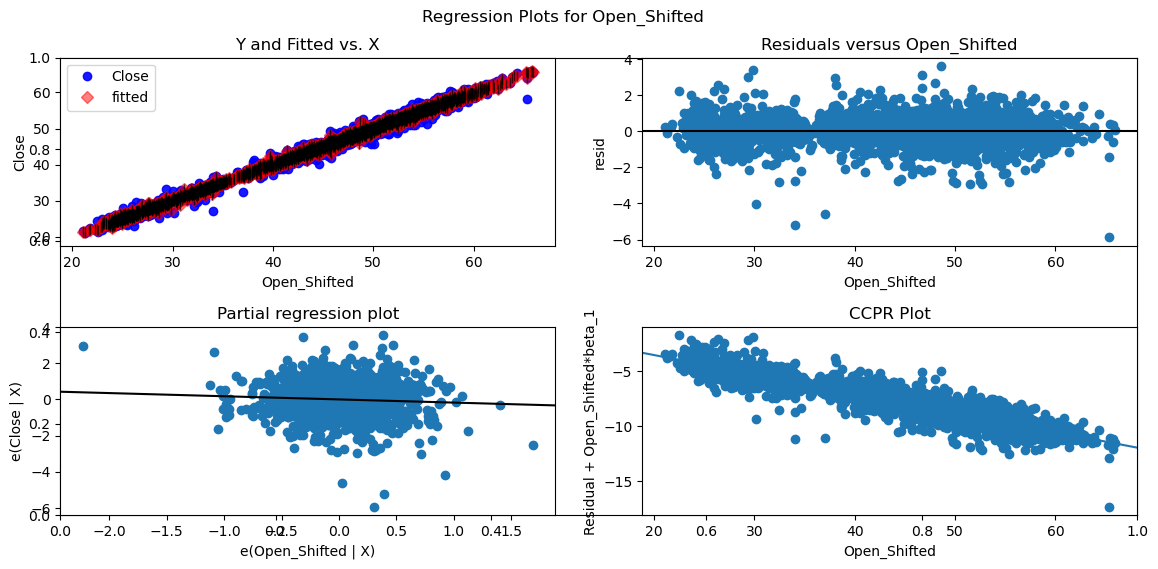

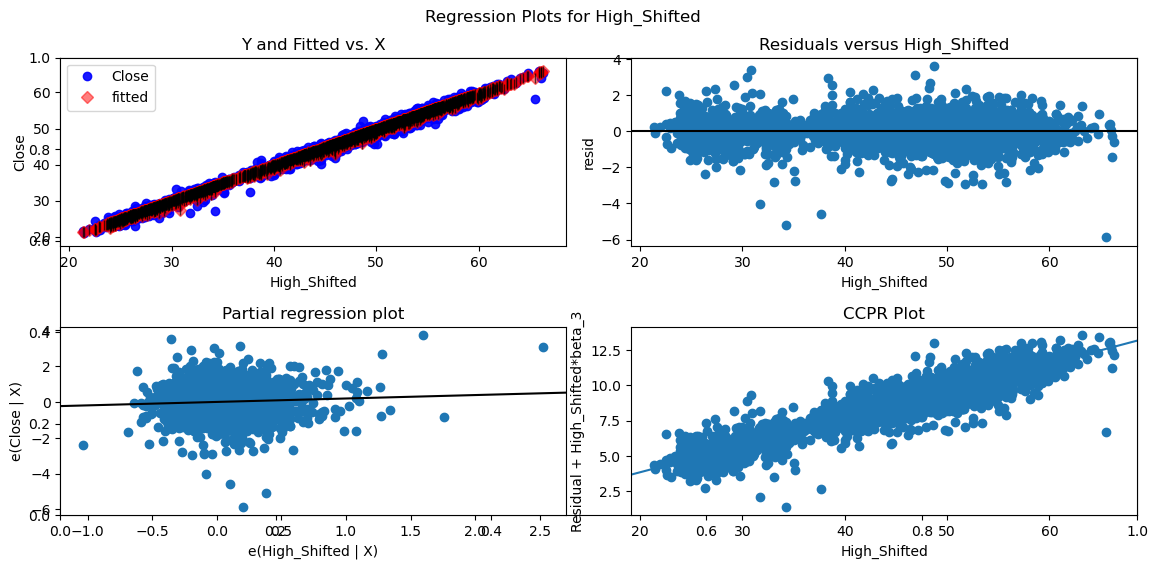

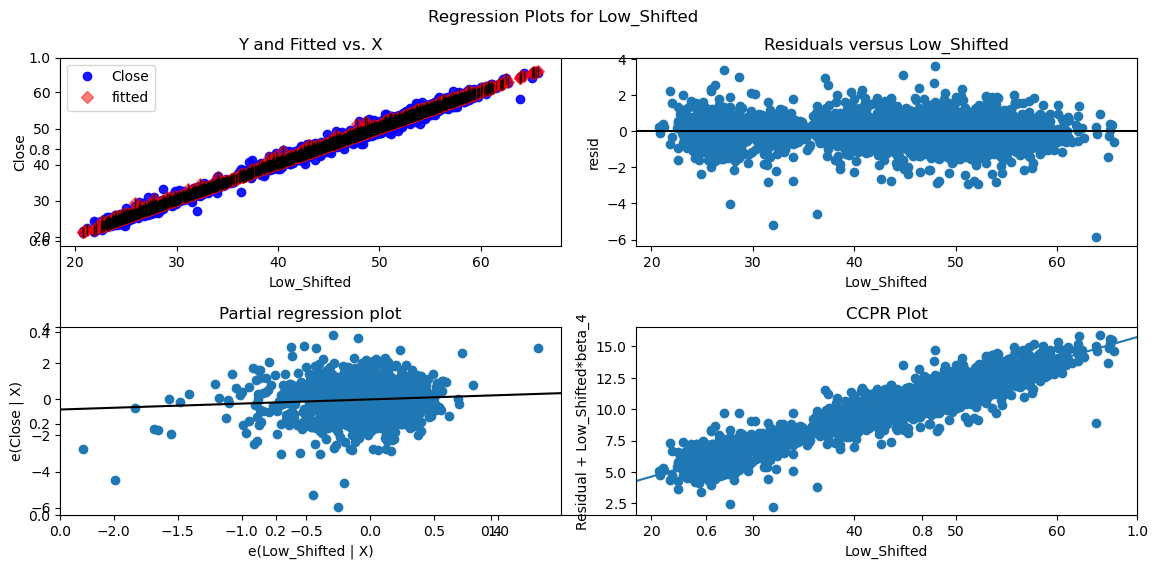

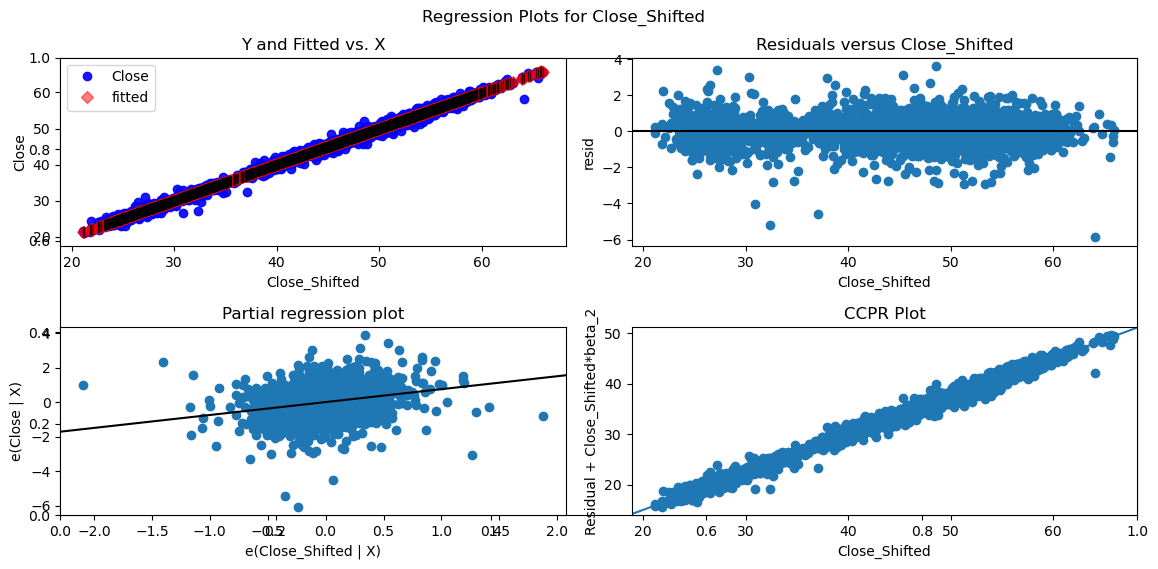

In [88]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(12, 6))
sm.graphics.plot_regress_exog(results, 'Open_Shifted', fig=fig)
plt.show()
fig, axes = plt.subplots(figsize=(12, 6))
sm.graphics.plot_regress_exog(results, 'High_Shifted',fig=fig)
plt.show()
fig, axes = plt.subplots(figsize=(12, 6))
sm.graphics.plot_regress_exog(results, 'Low_Shifted',fig=fig)
plt.show()
fig, axes = plt.subplots(figsize=(12, 6))
sm.graphics.plot_regress_exog(results, 'Close_Shifted',fig=fig)
plt.show()



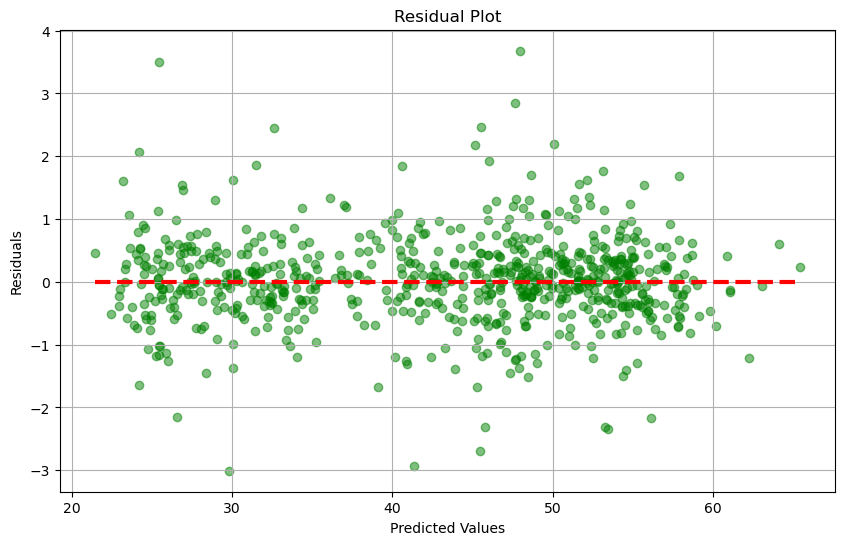

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred, color='green', alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed', lw=3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

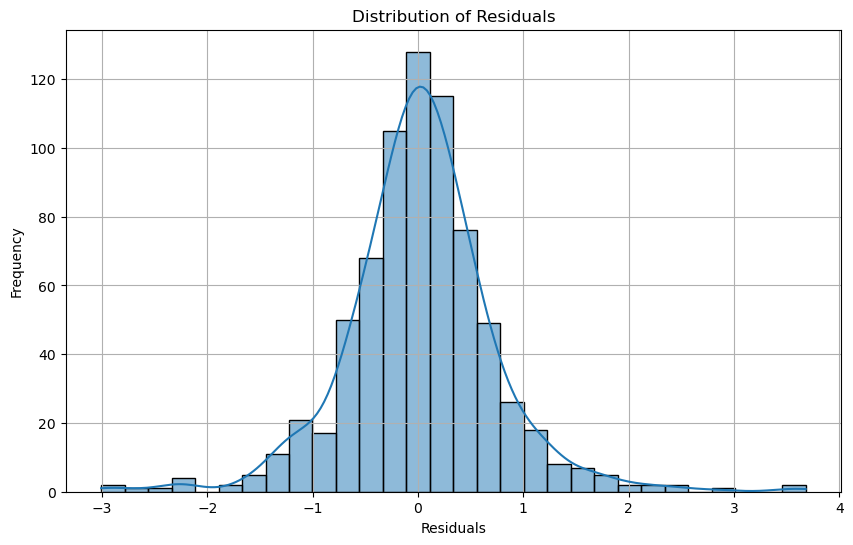

In [90]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()


Normal distribution of residuals suggest that linear regression model suits this data set
99% R2 and low MSE suggests the model works well
